# Binaural Modulation Sandbox

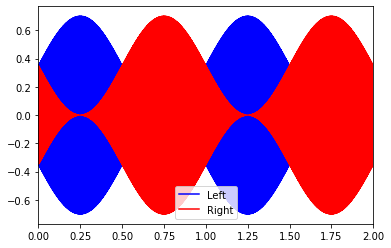

In [57]:
import matplotlib.pyplot as plt
from signal_processing import pure_tone_complex, sound, get_spect
import numpy as np

dur = 2;
fs = 44100;
int_aural_phase = np.pi;
c_amp = [5,3,2,1];
l_cfreq = 440*np.array([1,2,3,4]);
r_cfreq = l_cfreq;

# #Octave Lower
# r_cfreq = l_cfreq/2;

# #Upper Harmonics
# r_cfreq = 440*np.array([3,4,5,6]);

phase = np.zeros(len(l_cfreq));

L_modf = 1;
R_modf = L_modf;

tvect = np.arange(0,dur,1/fs)

L_mod = np.sin(2*np.pi*L_modf*tvect) + 1;
R_mod = np.sin(2*np.pi*R_modf*tvect + int_aural_phase) + 1;

L_car = pure_tone_complex(l_cfreq, fs, dur, c_amp, phase, type = 'sin')[1]
R_car = pure_tone_complex(r_cfreq, fs, dur, c_amp, phase, type = 'sin')[1];

L = L_mod*L_car;
R = R_mod*R_car;

#normalize to .7 to prevent clipping/not too loud

L = .7*L/np.max(L);
R = .7*R/np.max(R);

plt.plot(tvect,L,label = "Left", color = 'blue')
plt.plot(tvect,R,label = "Right", color = 'red')
plt.legend()
plt.xlim(0,dur)

sound([L,R],fs)
#sound([L,R],fs,fname = '1Hz_AM_dichotic_upperharm.wav',savefile=1)